# 0. Header

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import category_encoders as ce

from sklearn.impute import KNNImputer, SimpleImputer



In [2]:
# Defines
PATH_DATASET = "./dataset_raw/dataset_train.csv"
PATH_DATASET_OUTPUT = "./dataset_t/"
PLOT_WIDTH = 10

In [3]:
# Import dataset
dataset = pd.read_csv(PATH_DATASET)
dataset_size = dataset.size
column_target = "is_click"

dataset.sample(10)


,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
94159,501708,2017-07-03 07:45,627462,H,405490,60305,3,NaN,NaN,NaN,NaN,NaN,NaN,0,0
346445,149267,2017-07-06 12:22,1112150,I,359520,13787,2,NaN,2.0,Male,2.0,3.0,2.0,0,0
70167,356556,2017-07-02 20:33,538564,B,360936,13787,2,NaN,NaN,NaN,NaN,NaN,NaN,0,0
432588,185703,2017-07-07 12:26,54701,C,359520,13787,4,NaN,3.0,Male,3.0,3.0,4.0,0,0
124750,336803,2017-07-03 14:14,201428,H,359520,13787,4,NaN,2.0,Male,2.0,3.0,2.0,1,0
321345,88257,2017-07-06 06:42,453012,C,405490,60305,3,NaN,4.0,Male,4.0,3.0,NaN,0,0
7140,188199,2017-07-02 06:21,354145,C,359520,13787,4,NaN,2.0,Male,2.0,3.0,2.0,1,0
112176,333957,2017-07-03 11:09,557,H,359520,13787,4,NaN,2.0,Male,2.0,2.0,NaN,0,0
119106,88716,2017-07-03 12:49,80683,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,1.0,1,0
231306,471300,2017-07-04 21:54,706993,C,105960,11085,5,270915.0,11.0,Female,5.0,3.0,1.0,1,0


# 1. Parameters

## 1.1. Functions

In [4]:
# Parameter analyze
def analyze_nan_values(ds, param):
    print(f"NaN counts for '{param}': ", ds[param].isna().sum())

def analyze_value_counts(ds, param):
    value_counts = ds[param].value_counts()
    print(f"Value counts for '{param}': ", value_counts)
    return value_counts


In [55]:
# Parameter plot
def plot_histogram(ds, param, bins):
    sns.histplot(ds[param], bins = bins)
    plt.tight_layout()
    plt.title('Histogram Plot')
    plt.show()

def plot_bar(ds, param):
    category_counts = ds[param].value_counts()
    plt.figure(figsize=(8, 6))
    plt.bar(category_counts.index.astype(str), category_counts.values)
    plt.title('Bar Plot')
    plt.xlabel(param)
    plt.ylabel("Value Counts")
    plt.show()

def plot_correlation(ds, param, param_target):
    corr_matrix = ds[[param, param_target]].corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title('Correlation Matrix Plot')
    plt.show()

def plot_correlation_list(ds, param_list):
    corr_matrix = ds[param_list].corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title('Correlation Matrix Plot')
    plt.show()

def plot_scatter(ds, param, param_target):
    plt.scatter(ds[param], ds[param_target], color='blue', alpha=0.5)
    plt.grid(True)
    plt.title('Scatter Plot')
    plt.show()

def plot_violinPlot(ds, param, param_target):
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=param, y=param_target, data=ds)
    plt.title('Violin Plot')
    plt.show()

In [6]:
# Parameter transform
def get_oneHot_encoding(ds, param, param_target):
    ds_encoded = ds[[param, param_target]]
    ds_encoded = pd.get_dummies(ds_encoded, columns=[param])
    return ds_encoded, ds_encoded.columns.tolist()

## 1.2. Ad Parameters

### Session ID

This parameter can be dropped as its a random generated identifier with no relation with the target variable, so it doesn't carry predictive informatation.

In [7]:
parameter = "session_id"
analyze_nan_values(dataset, parameter)

NaN counts for 'session_id':  0


### Webpage ID

**Variable type**. Nominal categorical.

**Observation**. There are some webpage IDs that seems to encorage clicks in ads.

NaN counts for 'webpage_id':  0
Value counts for 'webpage_id':  webpage_id
13787    160043
60305     95973
28529     35531
6970      35065
45962     29314
53587     28826
1734      27849
11085     25781
51181     24909
Name: count, dtype: int64


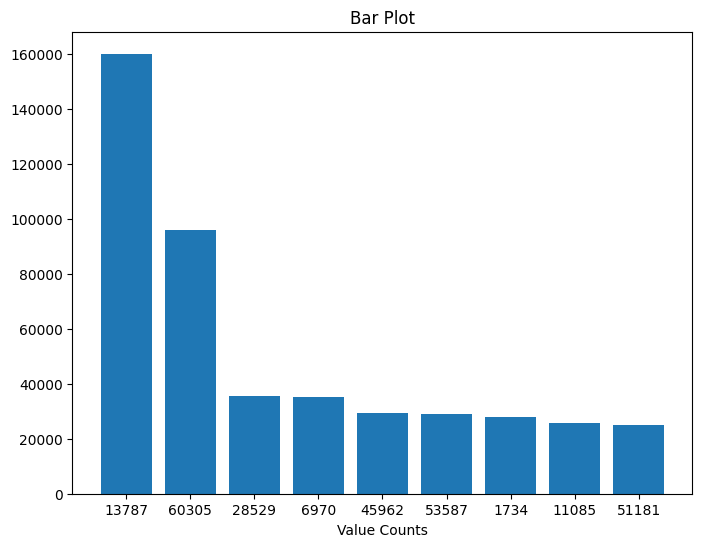

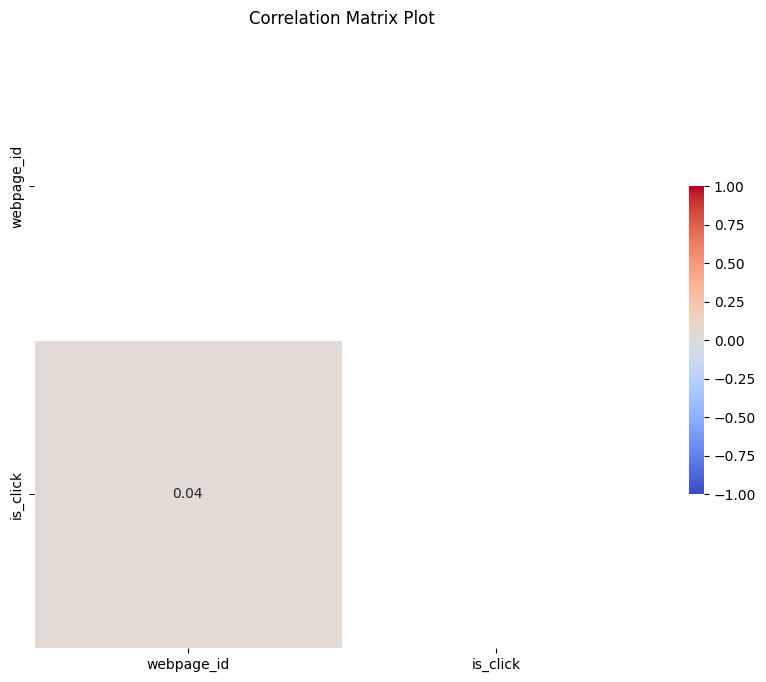

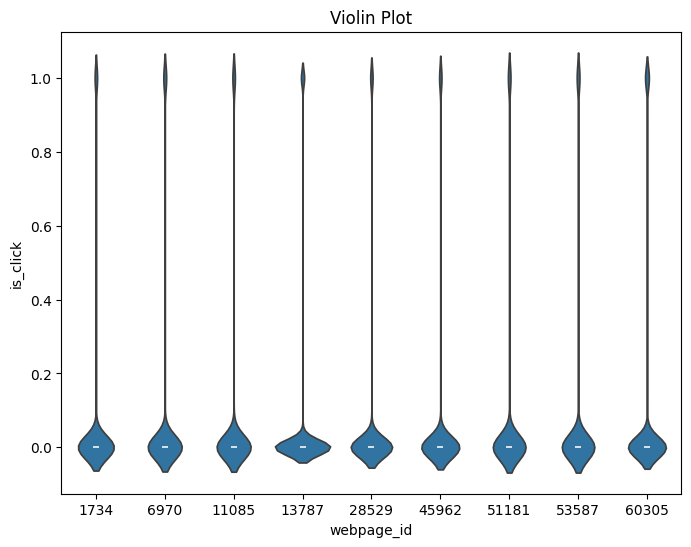

In [8]:
parameter = "webpage_id"
analyze_nan_values(dataset, parameter)
analyze_value_counts(dataset, parameter)
plot_bar(dataset, parameter)
plot_correlation(dataset, parameter, column_target)
plot_violinPlot(dataset, parameter, column_target)

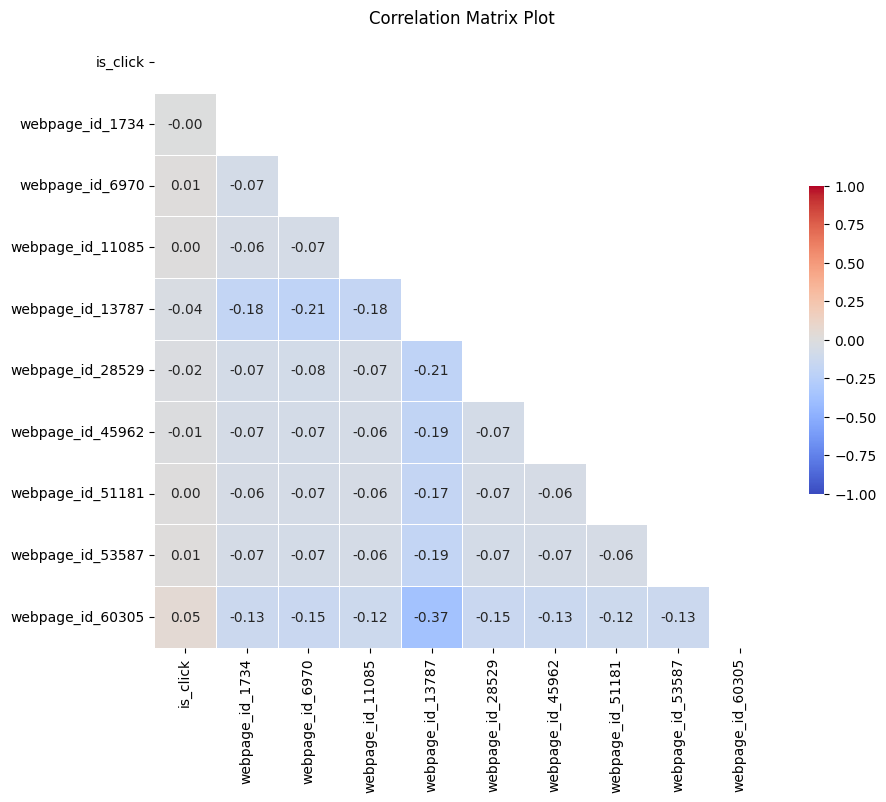

In [9]:
parameter = "webpage_id"
ds_encoded, ds_encoded_params = get_oneHot_encoding(dataset, parameter, column_target)
plot_correlation_list(ds_encoded, ds_encoded_params)

### Campaign ID

**Variable type**. Nominal categorical.

**Observation**. There are some campaigns that seems to encorage clicks in ads.

NaN counts for 'campaign_id':  0
Value counts for 'campaign_id':  campaign_id
359520    108155
405490     95973
360936     51888
118601     35531
98970      35065
414149     29314
404347     28826
82320      27849
105960     25781
396664     24909
Name: count, dtype: int64


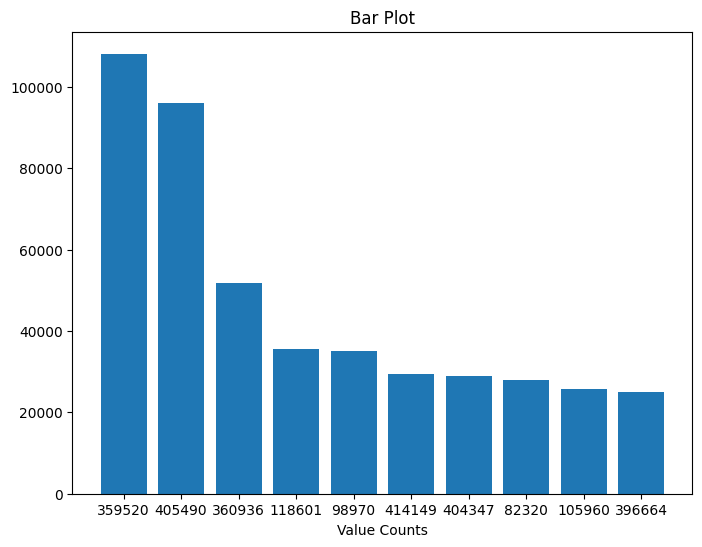

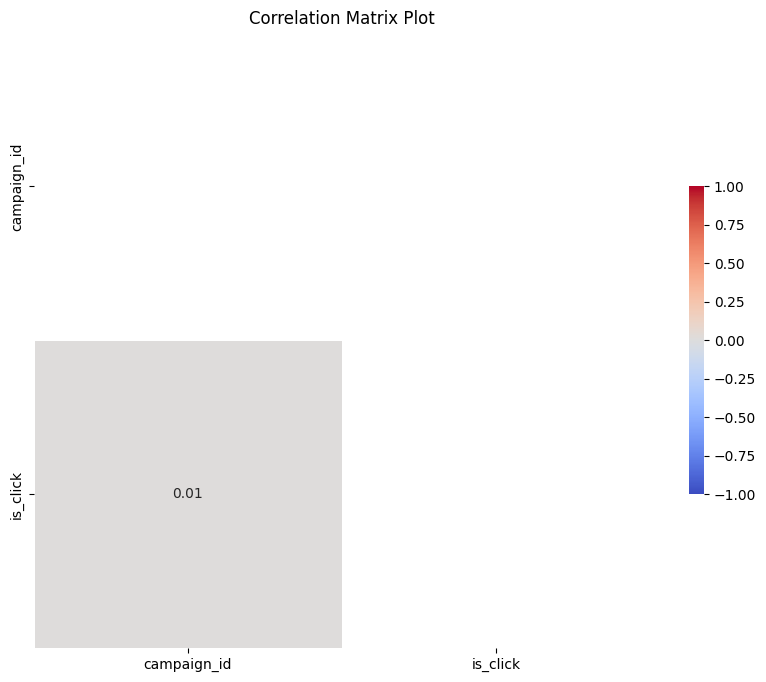

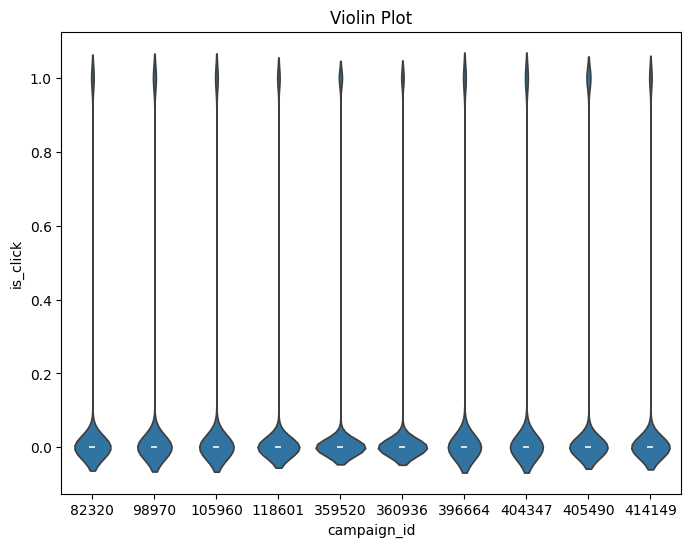

In [10]:
parameter = "campaign_id"
analyze_nan_values(dataset, parameter)
analyze_value_counts(dataset, parameter)
plot_bar(dataset, parameter)
plot_correlation(dataset, parameter, column_target)
plot_violinPlot(dataset, parameter, column_target)

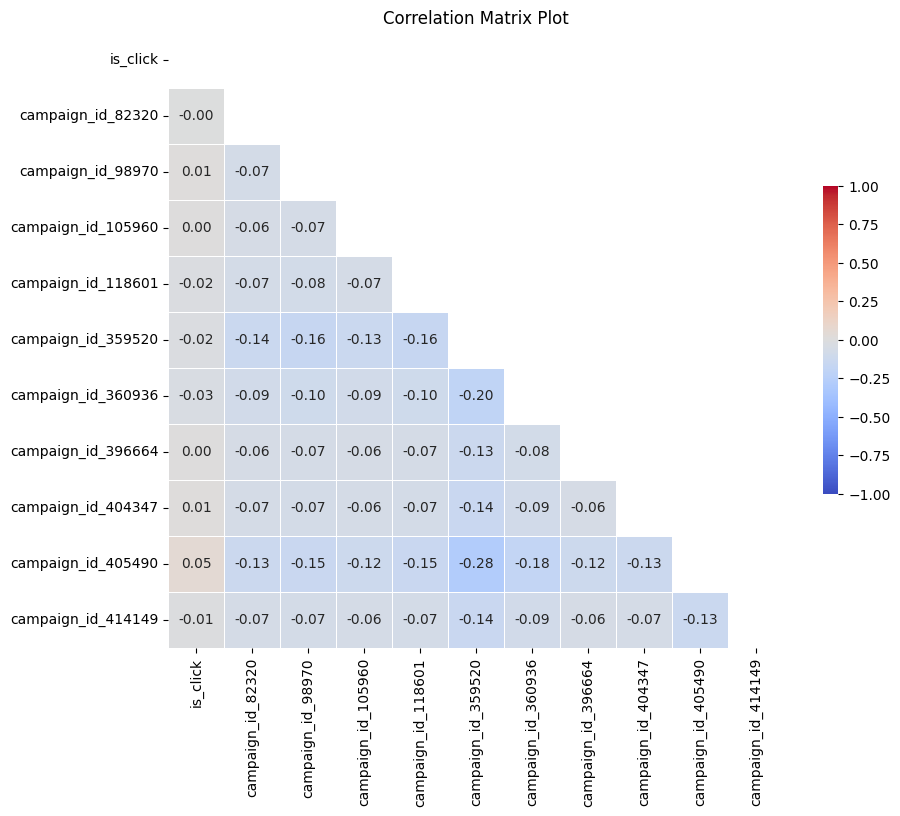

In [11]:
parameter = "campaign_id"
ds_encoded, ds_encoded_params = get_oneHot_encoding(dataset, parameter, column_target)
plot_correlation_list(ds_encoded, ds_encoded_params)

### User ID

This parameter can be dropped as its a random generated identifier with no relation with the target variable, so it doesn't carry predictive informatation.

In [12]:
parameter = "session_id"
analyze_nan_values(dataset, parameter)

NaN counts for 'session_id':  0


### User Group ID

NaN counts for 'user_group_id':  18243
Value counts for 'user_group_id':  user_group_id
3.0     140317
2.0     137278
4.0      50080
1.0      41946
5.0      21989
9.0      20264
10.0     13779
11.0      8839
8.0       6223
6.0       1724
7.0       1421
12.0      1035
0.0        153
Name: count, dtype: int64


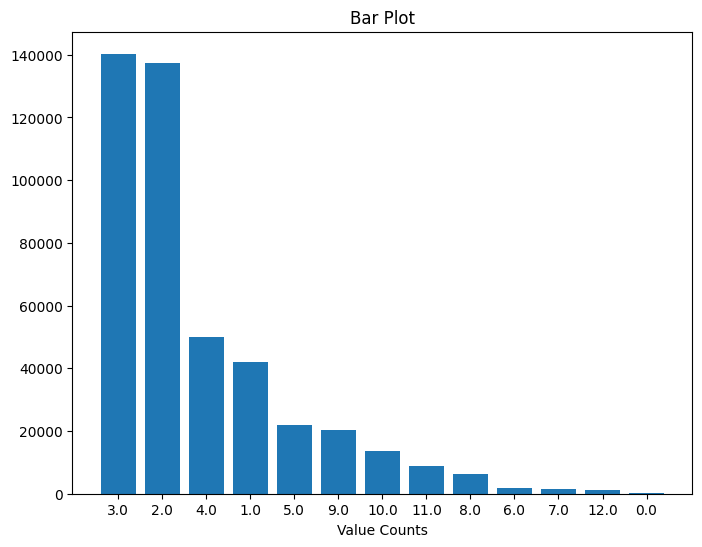

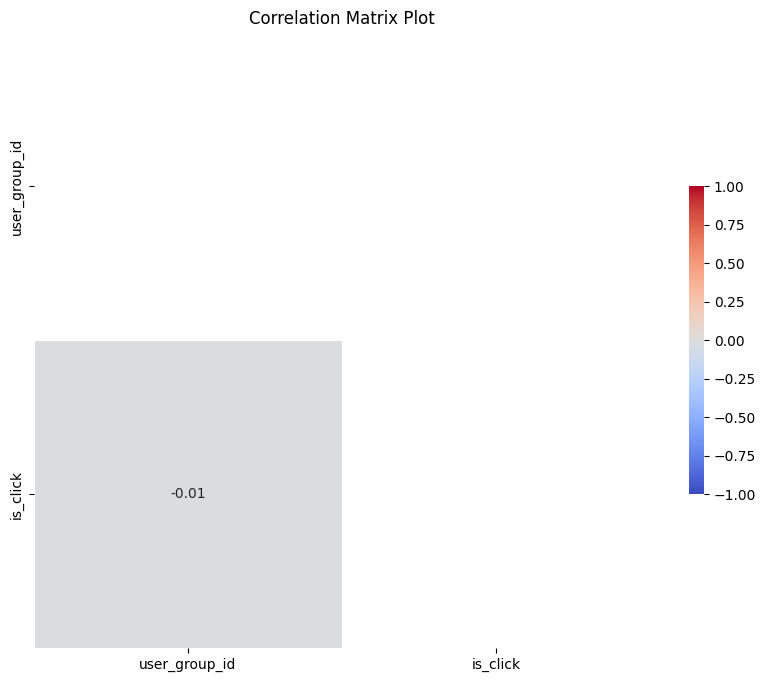

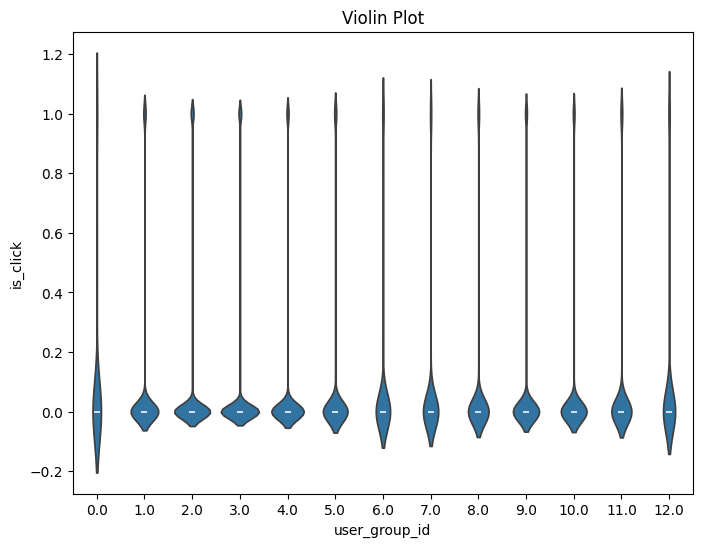

In [13]:
parameter = "user_group_id"
analyze_nan_values(dataset, parameter)
analyze_value_counts(dataset, parameter)
plot_bar(dataset, parameter)
plot_correlation(dataset, parameter, column_target)
plot_violinPlot(dataset, parameter, column_target)

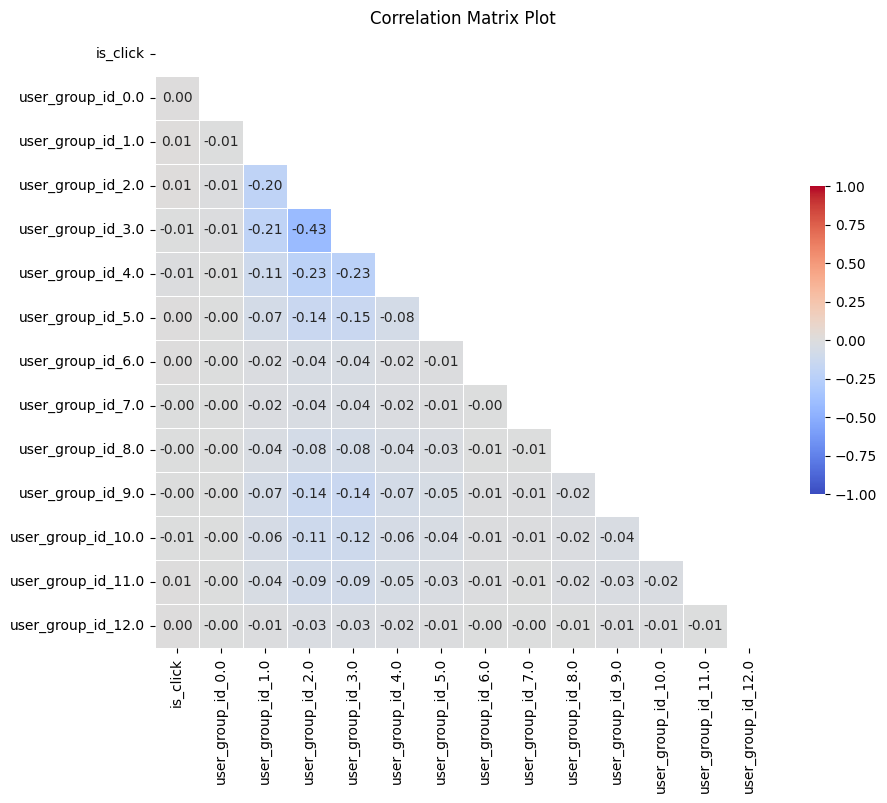

In [14]:
parameter = "user_group_id"
ds_encoded, ds_encoded_params = get_oneHot_encoding(dataset, parameter, column_target)
plot_correlation_list(ds_encoded, ds_encoded_params)

### Var 1

NaN counts for 'var_1':  0
Value counts for 'var_1':  var_1
0    267704
1    195587
Name: count, dtype: int64


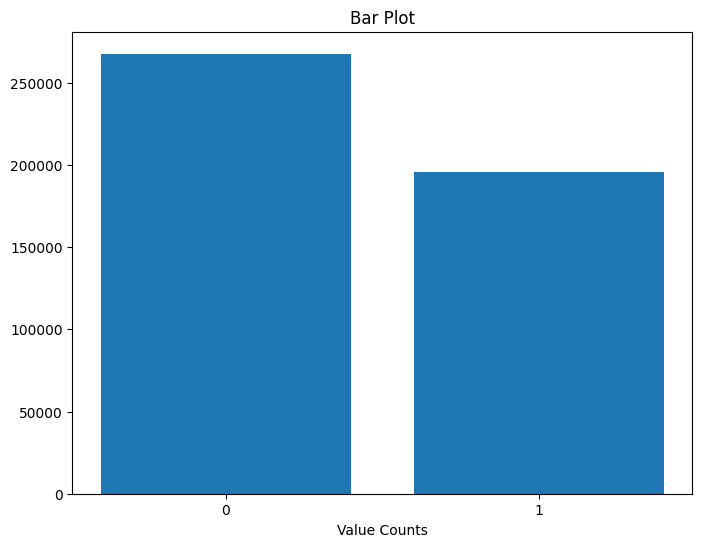

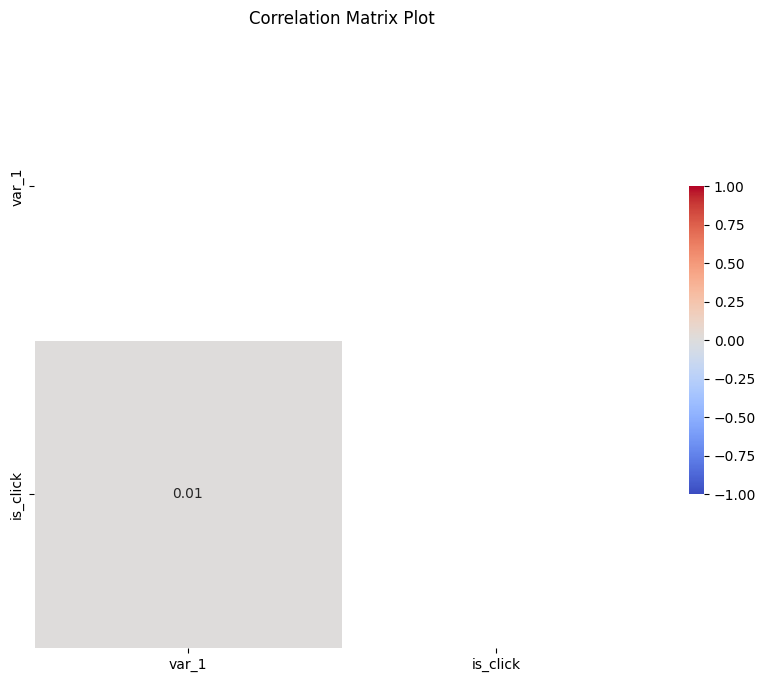

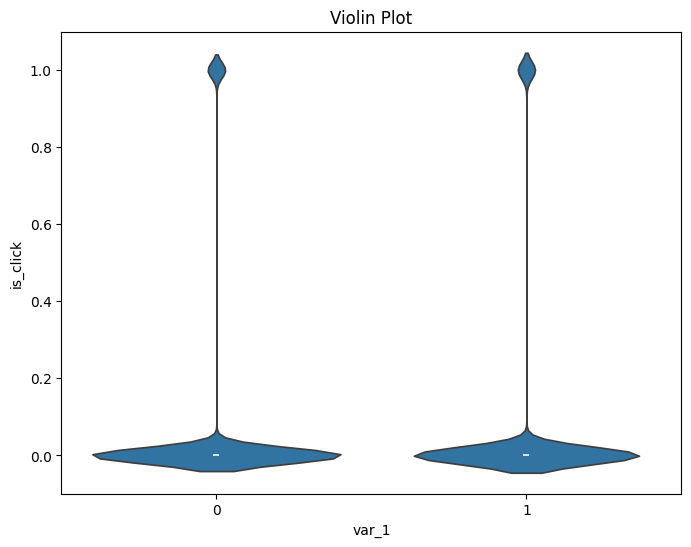

In [15]:
parameter = "var_1"
analyze_nan_values(dataset, parameter)
analyze_value_counts(dataset, parameter)
plot_bar(dataset, parameter)
plot_correlation(dataset, parameter, column_target)
plot_violinPlot(dataset, parameter, column_target)

### DateTime

The minute parameter has a cyclical nature. One way is to apply sine and cosine transformation.

In [16]:
parameter = "DateTime"

# Extract dateTime column into minutes column 
df = pd.DataFrame(dataset)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype("string")
df.dtypes
df[parameter] = pd.to_datetime(df[parameter])
df["minutes"] = df[parameter].dt.hour * 60 + df[parameter].dt.minute

NaN counts for 'minutes':  0
Value counts for 'minutes':  minutes
1239    665
1231    653
1232    652
1228    647
1227    645
       ... 
134      14
123      13
118      13
139      12
142      10
Name: count, Length: 1440, dtype: int64


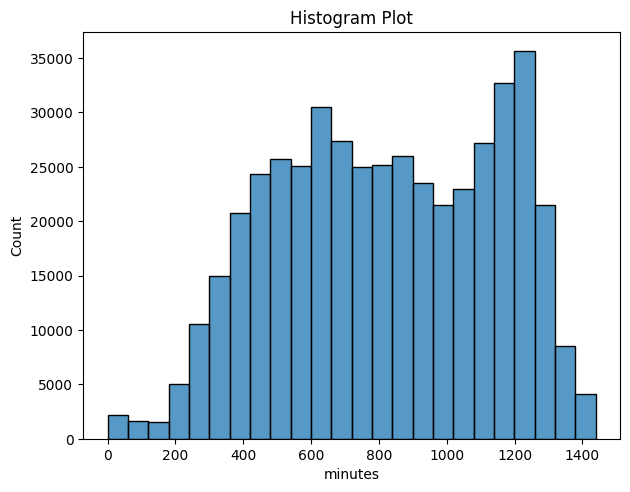

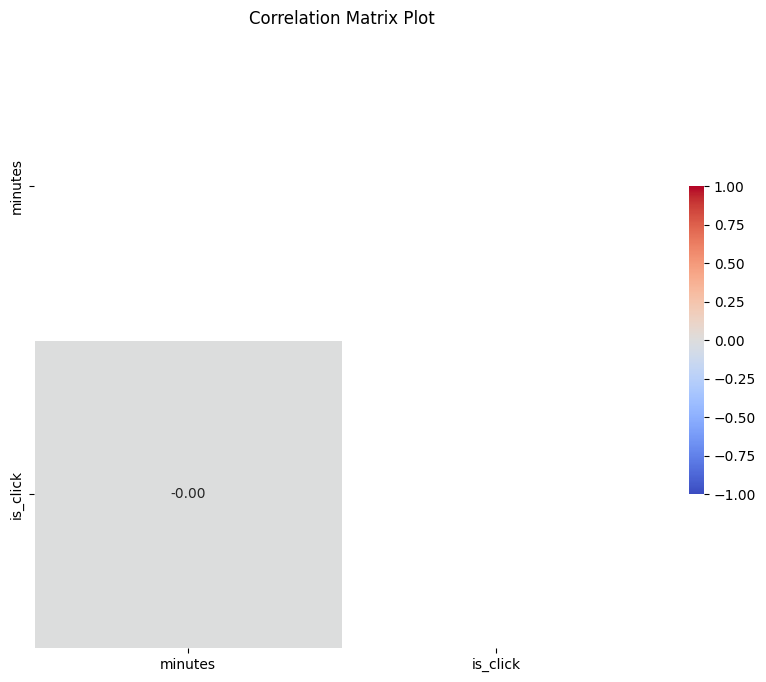

In [17]:
parameter = "minutes"

analyze_nan_values(df, parameter)
analyze_value_counts(df, parameter)
plot_histogram(df, parameter, 24)
plot_correlation(df, parameter, column_target)

## 1.3. Product Parameters

### Product

NaN counts for 'product':  0
Value counts for 'product':  product
C    163501
H    109574
I     63711
D     41064
B     22479
E     21452
A     15391
J      9698
G      9414
F      7007
Name: count, dtype: int64


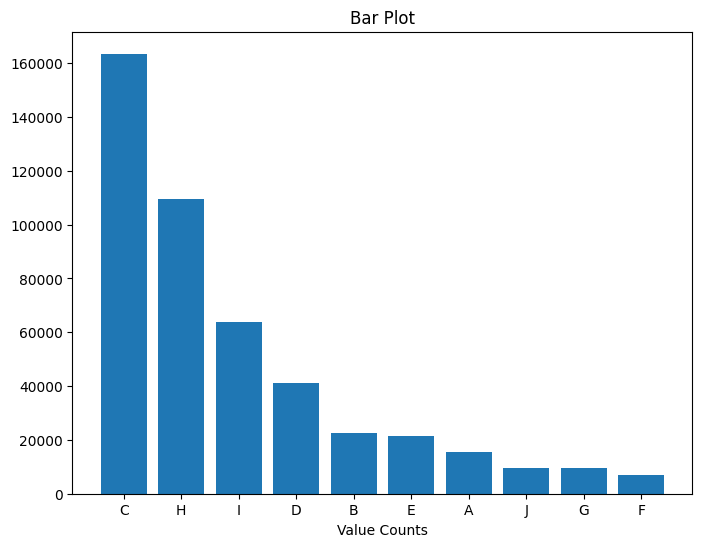

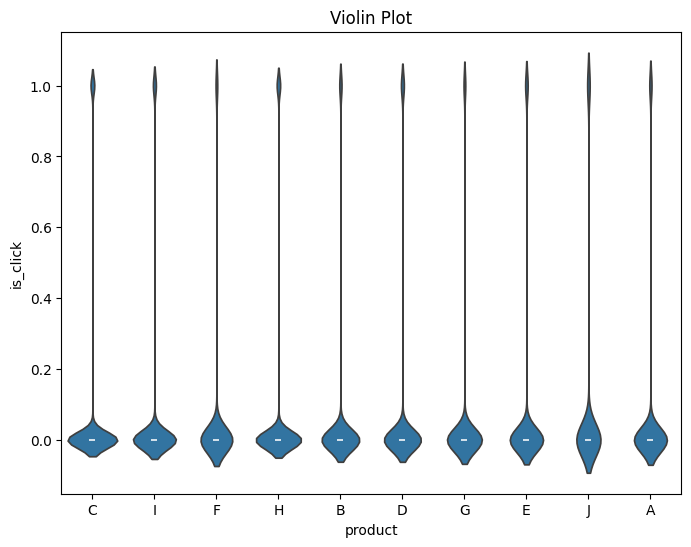

In [18]:
parameter = "product"
analyze_nan_values(dataset, parameter)
analyze_value_counts(dataset, parameter)
plot_bar(dataset, parameter)
plot_violinPlot(dataset, parameter, column_target)

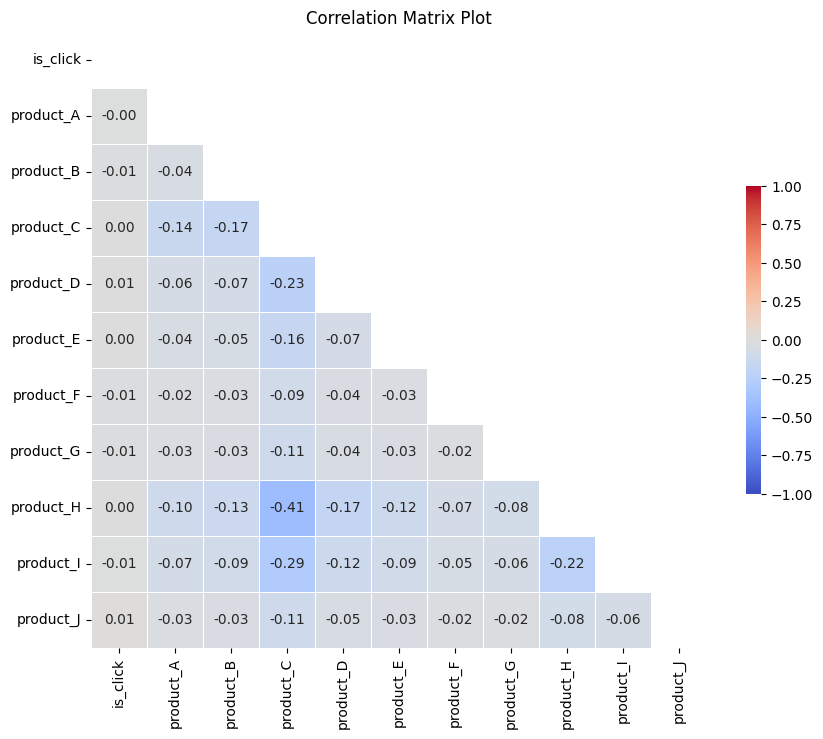

In [19]:
parameter = "product"
ds_encoded, ds_encoded_params = get_oneHot_encoding(dataset, parameter, column_target)
plot_correlation_list(ds_encoded, ds_encoded_params)

### Product Category 1

NaN counts for 'product_category_1':  0
Value counts for 'product_category_1':  product_category_1
4    133290
3    113812
1     81141
2     69183
5     65865
Name: count, dtype: int64


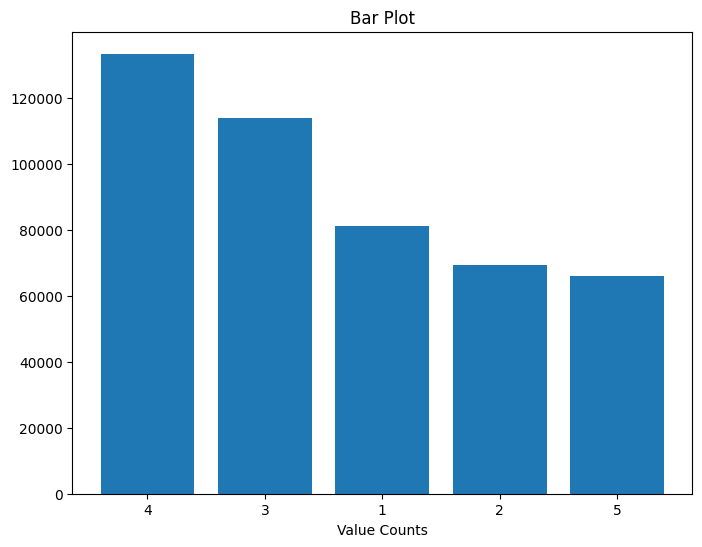

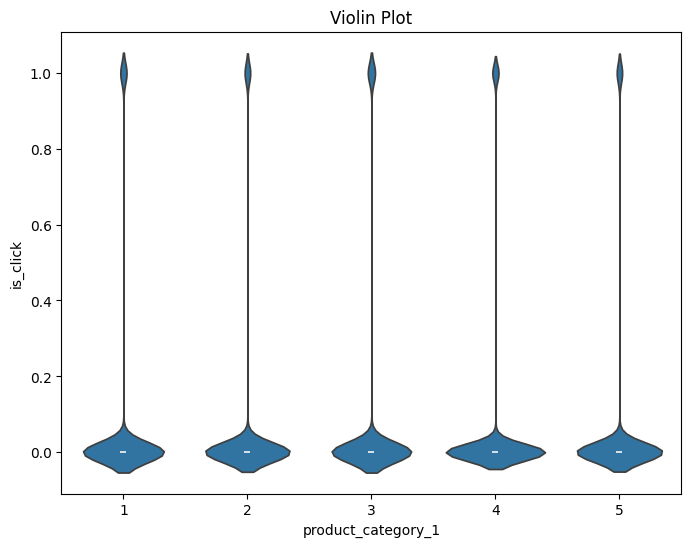

In [20]:
parameter = "product_category_1"
analyze_nan_values(dataset, parameter)
analyze_value_counts(dataset, parameter)
plot_bar(dataset, parameter)
plot_violinPlot(dataset, parameter, column_target)

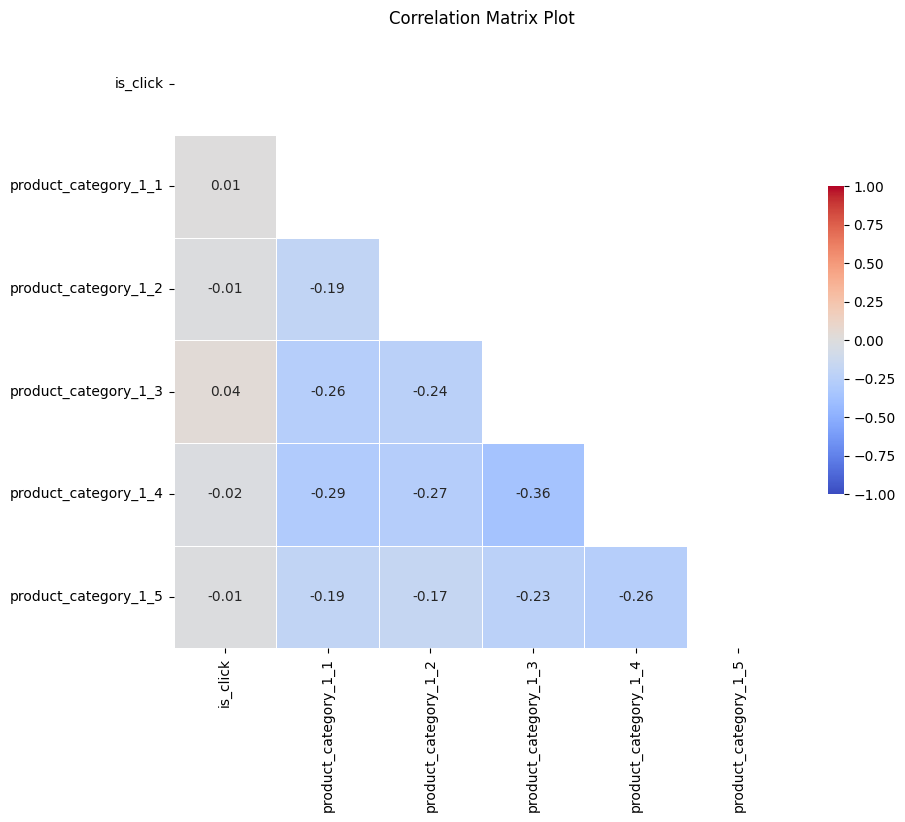

In [21]:
parameter = "product_category_1"
ds_encoded, ds_encoded_params = get_oneHot_encoding(dataset, parameter, column_target)
plot_correlation_list(ds_encoded, ds_encoded_params)

### Product Category 2

There are too many rows without this data, so it can be dropped.

NaN counts for 'product_category_2':  365854
Value counts for 'product_category_2':  product_category_2
82527.0     35531
146115.0    25224
270915.0    19624
254132.0    12502
143597.0     2701
269093.0      858
32026.0       578
18595.0        76
408790.0       67
255689.0       62
419804.0       43
372532.0       41
66101.0        34
234846.0       25
235358.0       19
450184.0       14
408831.0       12
327439.0        8
300711.0        4
447834.0        3
168114.0        2
99226.0         2
202351.0        1
301147.0        1
270147.0        1
181650.0        1
419304.0        1
381435.0        1
247789.0        1
Name: count, dtype: int64


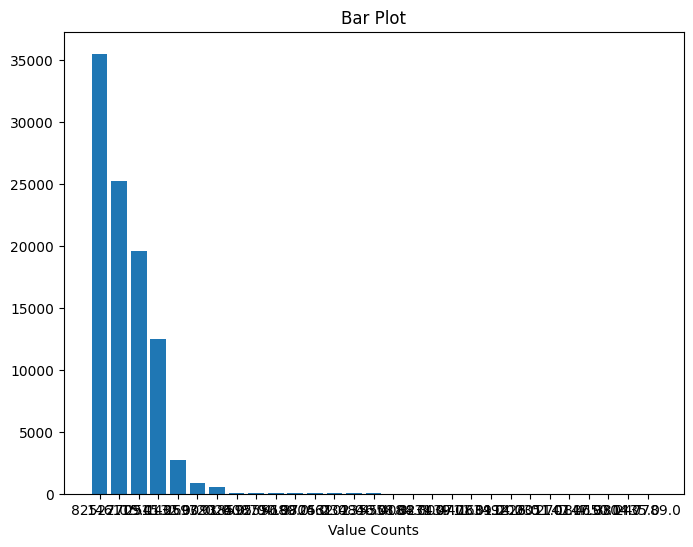

In [22]:
parameter = "product_category_2"
analyze_nan_values(dataset, parameter)
analyze_value_counts(dataset, parameter)
plot_bar(dataset, parameter)

## 1.4. User Parameters

### Gender

There are some NaN values.

NaN counts for 'gender':  18243
Value counts for 'gender':  gender
Male      393454
Female     51594
Name: count, dtype: int64


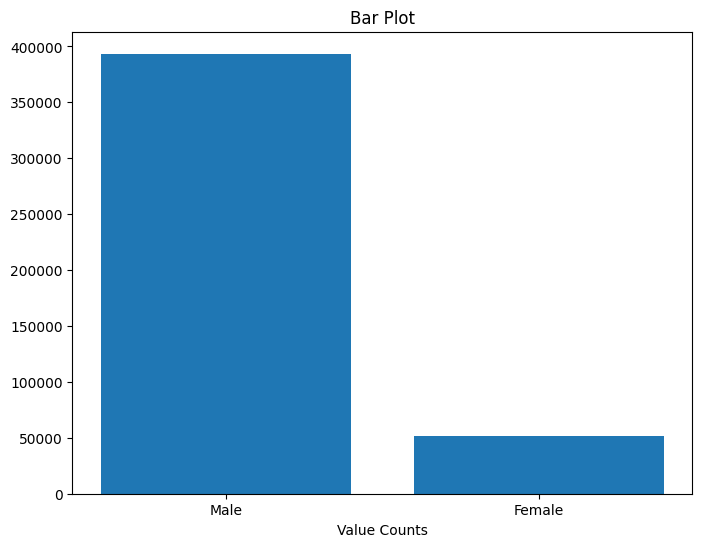

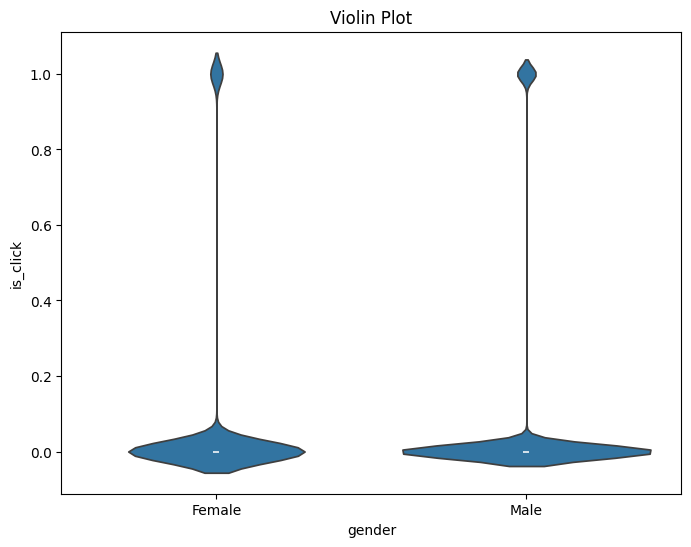

In [23]:
parameter = "gender"
analyze_nan_values(dataset, parameter)
analyze_value_counts(dataset, parameter)
plot_bar(dataset, parameter)
plot_violinPlot(dataset, parameter, column_target)

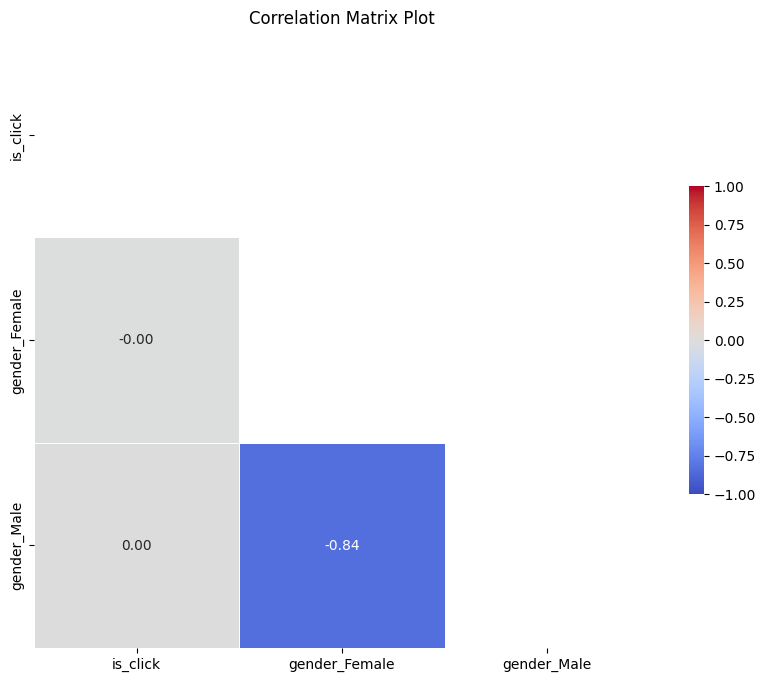

In [24]:
parameter = "gender"
ds_encoded, ds_encoded_params = get_oneHot_encoding(dataset, parameter, column_target)
plot_correlation_list(ds_encoded, ds_encoded_params)

### Age Level

NaN counts for 'age_level':  18243
Value counts for 'age_level':  age_level
3.0    160581
2.0    143501
4.0     63859
1.0     43367
5.0     30828
6.0      2759
0.0       153
Name: count, dtype: int64


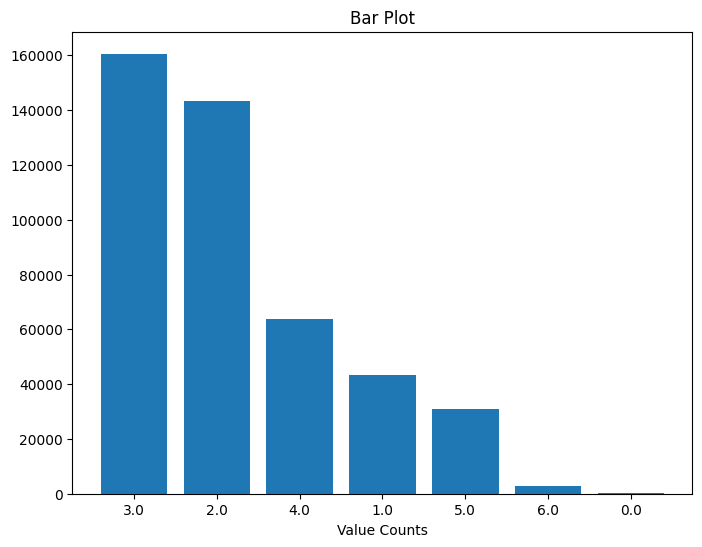

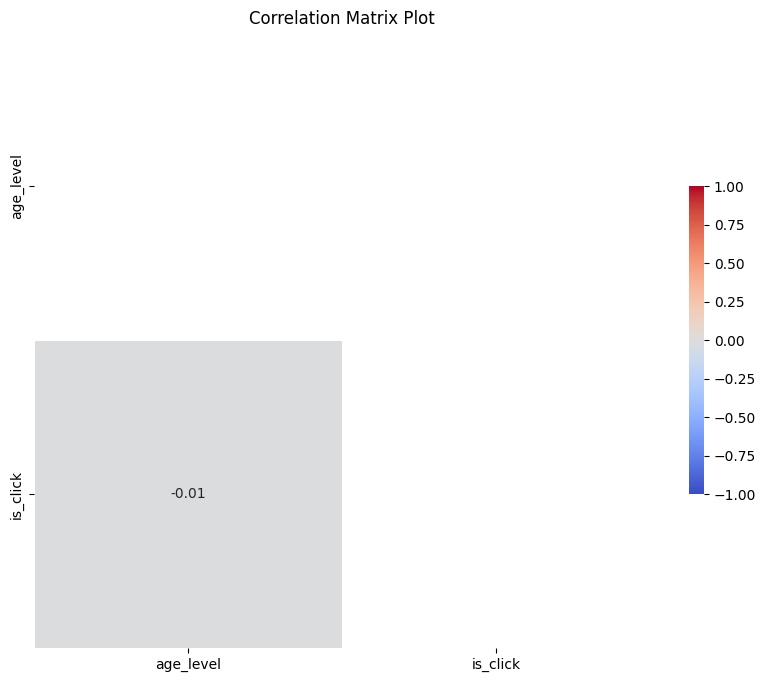

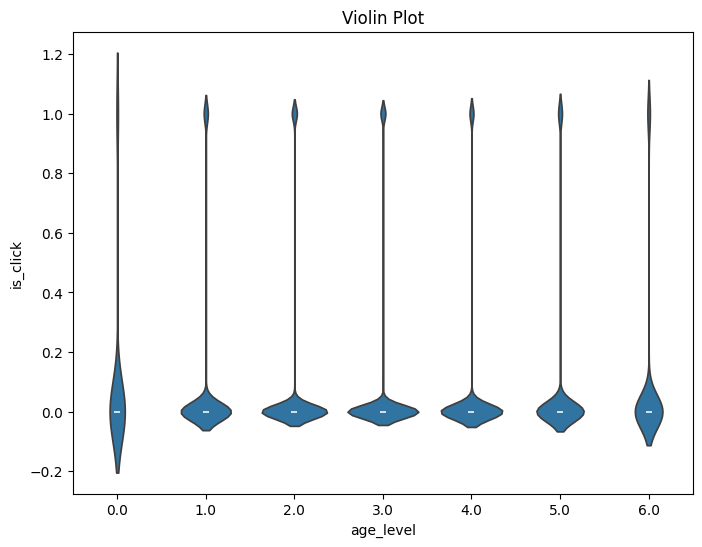

In [25]:
parameter = "age_level"
analyze_nan_values(dataset, parameter)
analyze_value_counts(dataset, parameter)
plot_bar(dataset, parameter)
plot_correlation(dataset, parameter, column_target)
plot_violinPlot(dataset, parameter, column_target)

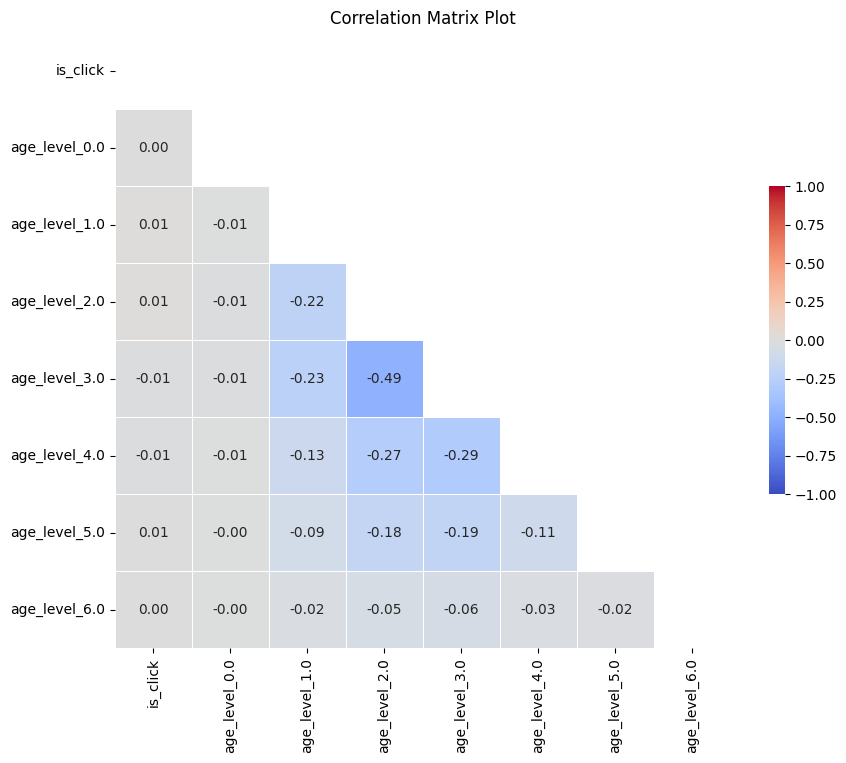

In [26]:
parameter = "age_level"
ds_encoded, ds_encoded_params = get_oneHot_encoding(dataset, parameter, column_target)
plot_correlation_list(ds_encoded, ds_encoded_params)

### User Depth

NaN counts for 'user_depth':  18243
Value counts for 'user_depth':  user_depth
3.0    402798
2.0     30389
1.0     11861
Name: count, dtype: int64


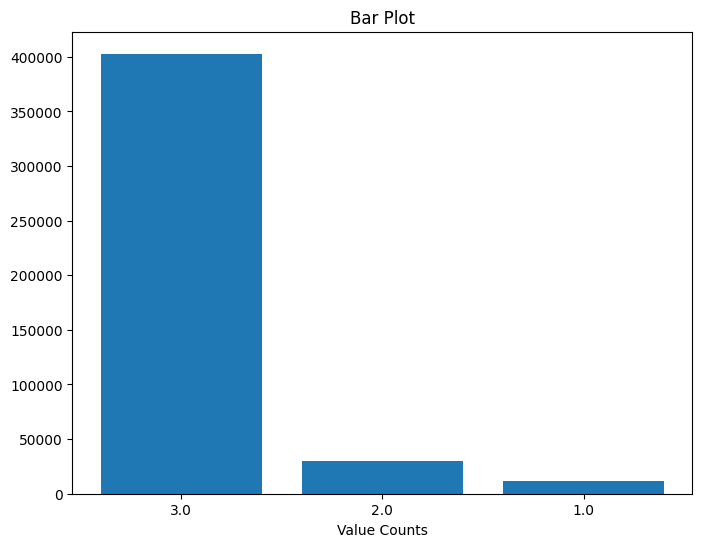

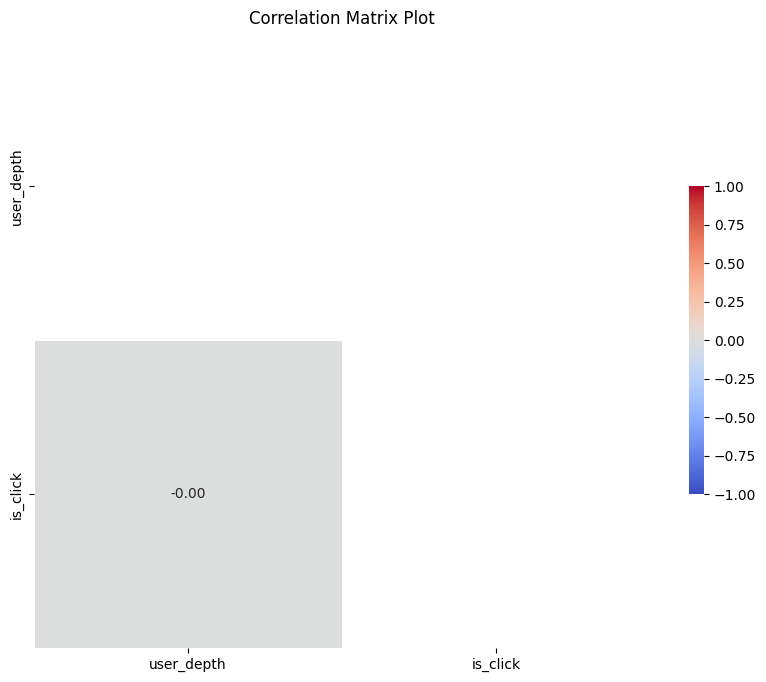

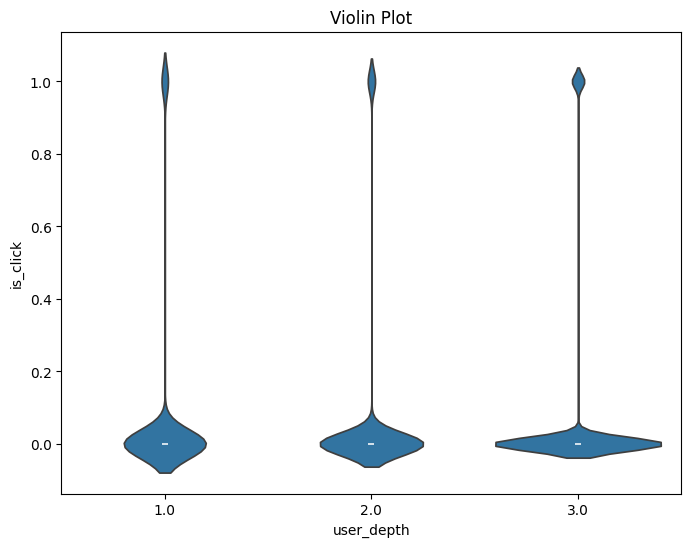

In [27]:
parameter = "user_depth"
analyze_nan_values(dataset, parameter)
analyze_value_counts(dataset, parameter)
plot_bar(dataset, parameter)
plot_correlation(dataset, parameter, column_target)
plot_violinPlot(dataset, parameter, column_target)

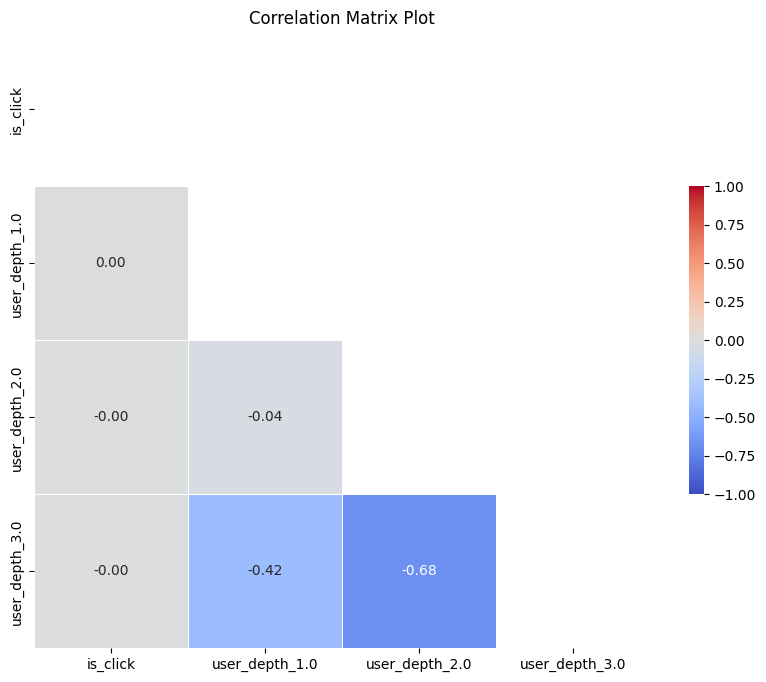

In [28]:
parameter = "user_depth"
ds_encoded, ds_encoded_params = get_oneHot_encoding(dataset, parameter, column_target)
plot_correlation_list(ds_encoded, ds_encoded_params)

### City Devolpment Index

NaN counts for 'city_development_index':  125129
Value counts for 'city_development_index':  city_development_index
2.0    147643
3.0     88709
4.0     67166
1.0     34644
Name: count, dtype: int64


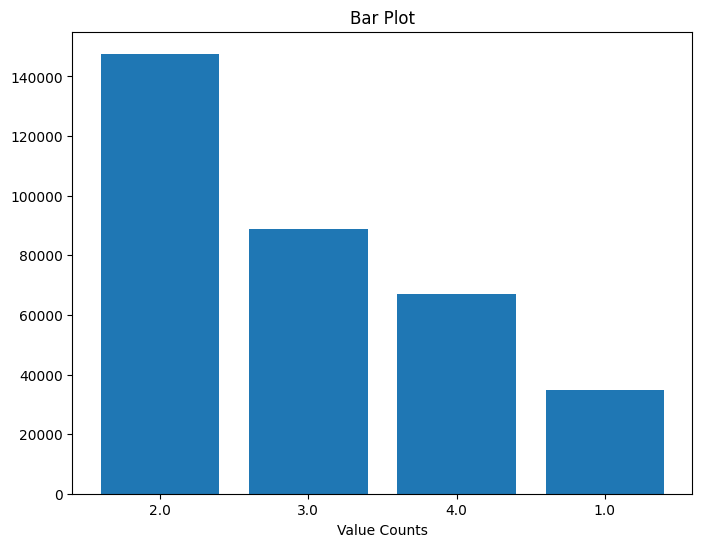

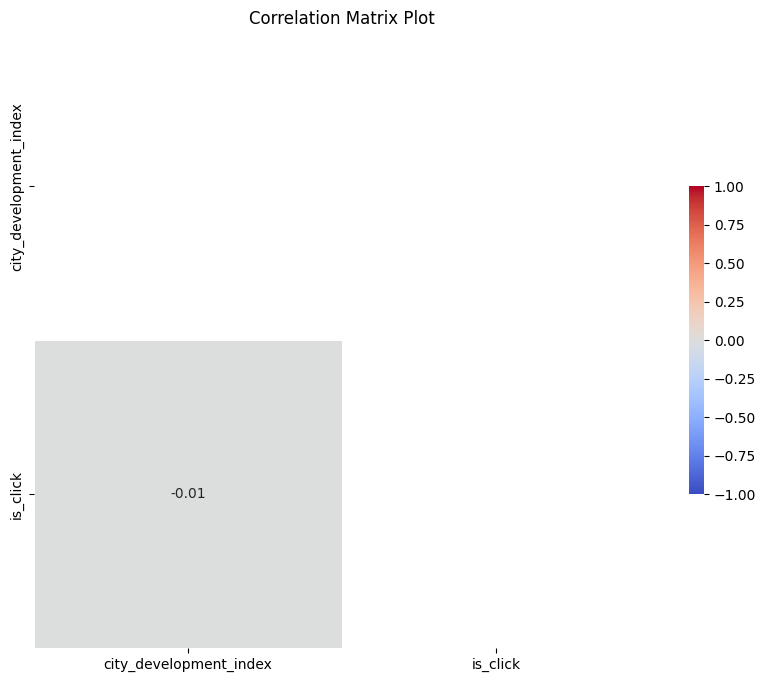

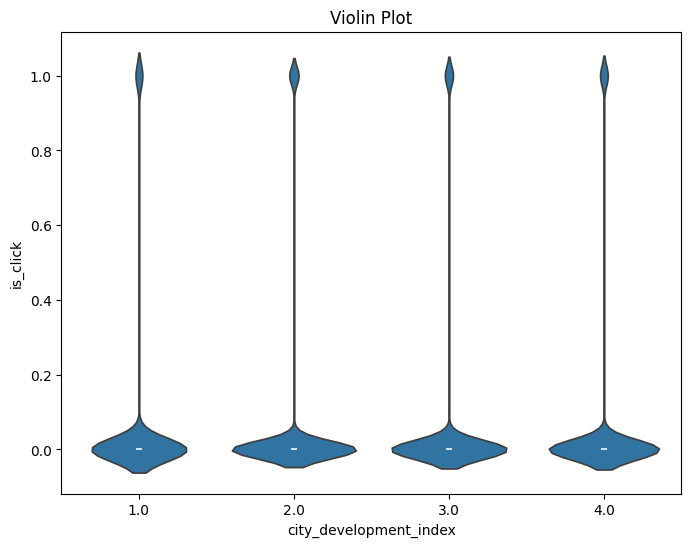

In [29]:
parameter = "city_development_index"
analyze_nan_values(dataset, parameter)
analyze_value_counts(dataset, parameter)
plot_bar(dataset, parameter)
plot_correlation(dataset, parameter, column_target)
plot_violinPlot(dataset, parameter, column_target)

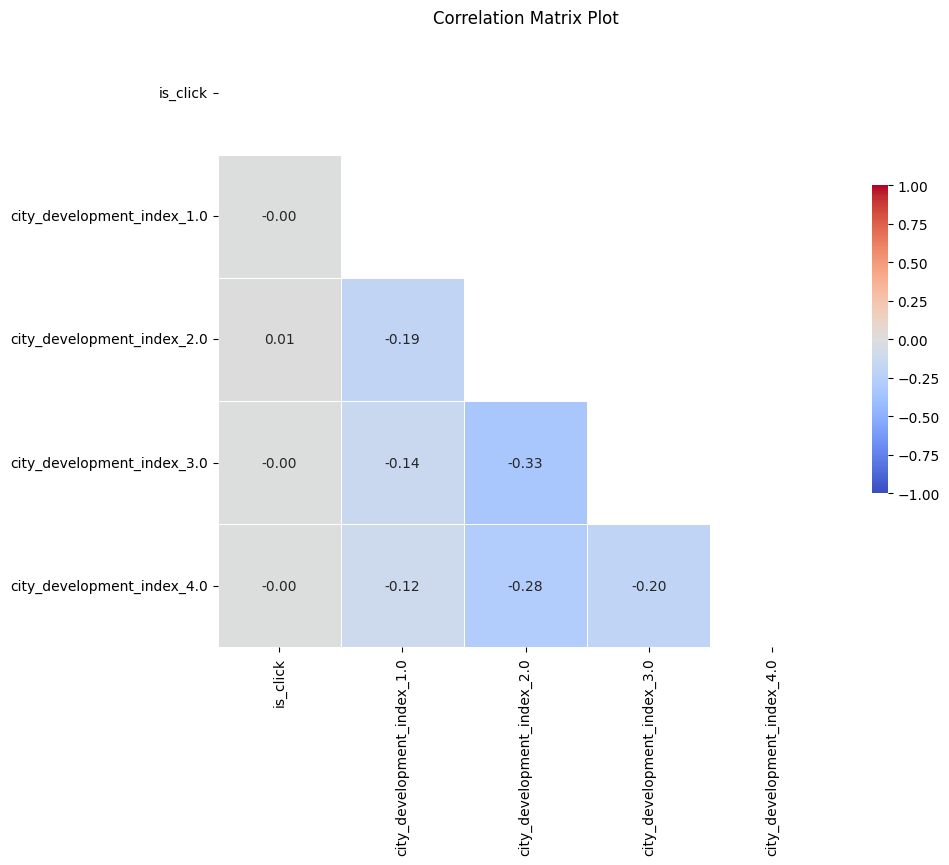

In [30]:
parameter = "city_development_index"
ds_encoded, ds_encoded_params = get_oneHot_encoding(dataset, parameter, column_target)
plot_correlation_list(ds_encoded, ds_encoded_params)

## 1.5. Target Parameter

Unbalanced dataset. Majority represents no_click.

NaN counts for 'is_click':  0
Value counts for 'is_click':  is_click
0    431960
1     31331
Name: count, dtype: int64


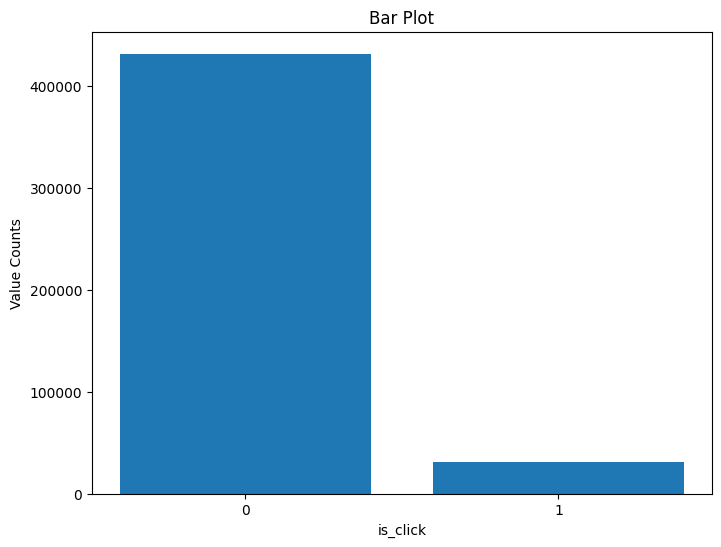

In [56]:
parameter = "is_click"
analyze_nan_values(dataset, parameter)
analyze_value_counts(dataset, parameter)
plot_bar(dataset, parameter)

## 2.1. Missing values

In [32]:
# Check parameters with missing values
print(pd.concat([dataset.isna().sum()/dataset_size*100, dataset.isna().sum()], axis=1))


                               0       1
session_id              0.000000       0
DateTime                0.000000       0
user_id                 0.000000       0
product                 0.000000       0
campaign_id             0.000000       0
webpage_id              0.000000       0
product_category_1      0.000000       0
product_category_2      5.264567  365854
user_group_id           0.262513   18243
gender                  0.262513   18243
age_level               0.262513   18243
user_depth              0.262513   18243
city_development_index  1.800582  125129
var_1                   0.000000       0
is_click                0.000000       0


In [33]:
# Remove columns which represent too many missing values
dataset_t = dataset.drop(["product_category_2"], axis=1)

## 2.2. Random features

In [34]:
# Removing random parameters
dataset_t = dataset_t.drop(["session_id", "user_id"], axis=1)

## 2.3. Feature encoding

### Minutes

In [35]:
parameter = "DateTime"

# Extract dateTime column into minutes column
for col in dataset_t.select_dtypes(include=['object']).columns:
    dataset_t[col] = dataset_t[col].astype("string")
dataset_t[parameter] = pd.to_datetime(dataset_t[parameter])
dataset_t["minutes"] = dataset_t[parameter].dt.hour * 60 + dataset_t[parameter].dt.minute

In [36]:
# Define the period for minutes (since there are 60*24 minutes in a day)
period = 60*24

# Apply sine and cosine transformations
dataset_t["minutes_sin"] = np.sin(2 * np.pi * dataset_t["minutes"] / period)
dataset_t["minutes_cos"] = np.cos(2 * np.pi * dataset_t["minutes"] / period)

In [37]:
# Removing datetime and minutes column
dataset_t = dataset_t.drop(["DateTime", "minutes"], axis=1)

### Gender

In [38]:
# Filling not specified gender with string "Not Specified"
dataset_t['gender'] = dataset_t['gender'].fillna('Not Specified')
dataset_t['is_male']   = dataset_t["gender"].apply(lambda x: 1 if x == 'Male' else 0)
dataset_t['is_female'] = dataset_t["gender"].apply(lambda x: 1 if x == 'Female' else 0)

In [39]:
# Removing gender column
dataset_t = dataset_t.drop(["gender"], axis=1)

### Webpage ID

In [40]:
frequency_encoding = dataset_t["webpage_id"].value_counts() / len(dataset_t)
dataset_t['webpage_id_encoded'] = dataset_t["webpage_id"].map(frequency_encoding)

In [41]:
dataset_t = dataset_t.drop(["webpage_id"], axis=1)

### Campaign ID

In [42]:
frequency_encoding = dataset_t["campaign_id"].value_counts() / len(dataset_t)
dataset_t['campaign_id_encoded'] = dataset_t["campaign_id"].map(frequency_encoding)

In [43]:
dataset_t = dataset_t.drop(["campaign_id"], axis=1)

### User Group ID

In [44]:
dataset_t['user_group_id'] = dataset_t['user_group_id'].fillna(0.0)

In [45]:
# Binary encoding
encoder = ce.BinaryEncoder(cols=['user_group_id'])
df_encoded = encoder.fit_transform(dataset_t['user_group_id'])
dataset_t = pd.concat([df_encoded, dataset_t], axis=1)

d:\Program Files\Python\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
d:\Program Files\Python\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
d:\Program Files\Python\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will c

In [46]:
dataset_t = dataset_t.drop(["user_group_id"], axis=1)

### Product

In [47]:
dataset_t['product'] = dataset_t['product'].fillna(0.0)

# Binary encoding
encoder = ce.BinaryEncoder(cols=['product'])
df_encoded = encoder.fit_transform(dataset_t['product'])
dataset_t = pd.concat([df_encoded, dataset_t], axis=1)

dataset_t = dataset_t.drop(["product"], axis=1)

### User Group ID

In [48]:
mode_imputer = SimpleImputer(strategy='most_frequent')
dataset_t['age_level'] = mode_imputer.fit_transform(dataset_t[["age_level"]])

### User Depth

In [49]:
dataset_t['user_depth'] = dataset_t['user_depth'].fillna(1.0)

### City Development Index

In [50]:
mode_imputer = SimpleImputer(strategy='most_frequent')
dataset_t['city_development_index'] = mode_imputer.fit_transform(dataset_t[["city_development_index"]])

## Checking missing values

In [51]:
print(pd.concat([dataset_t.isna().sum()/dataset_size*100, dataset_t.isna().sum()], axis=1))

                          0  1
product_0               0.0  0
product_1               0.0  0
product_2               0.0  0
product_3               0.0  0
user_group_id_0         0.0  0
user_group_id_1         0.0  0
user_group_id_2         0.0  0
user_group_id_3         0.0  0
product_category_1      0.0  0
age_level               0.0  0
user_depth              0.0  0
city_development_index  0.0  0
var_1                   0.0  0
is_click                0.0  0
minutes_sin             0.0  0
minutes_cos             0.0  0
is_male                 0.0  0
is_female               0.0  0
webpage_id_encoded      0.0  0
campaign_id_encoded     0.0  0


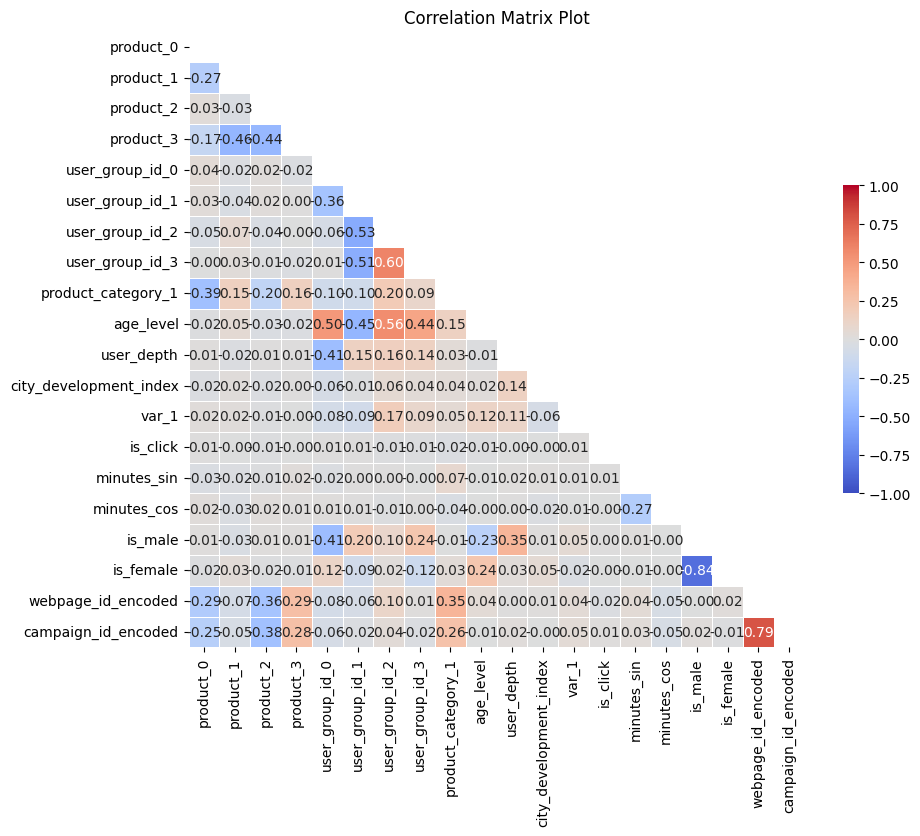

In [52]:
# Check correlation
plot_correlation_list(dataset_t, dataset_t.columns)

In [53]:
column_to_move = column_target

# Append the column to move at the end of the list
cols = list(dataset_t.columns)
cols.remove(column_to_move)
cols.append(column_to_move)

dataset_t = dataset_t[cols]

In [54]:
# Save dataset
dataset_t.to_csv(PATH_DATASET_OUTPUT+'dataset_t.csv', index=False)
